## Import CLIP

In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 476.1 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-jfu2hbhx
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-jfu2hbhx
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369370 sha256=b05988f7c7977734e89ce30d842bce60d88f87ca5beb12f8cb14872715d89ea9
  Stored in directory: /tmp/pip-ephem-wheel-cache-hdy77e9z/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


## Import  RefCOCOg

In [ ]:
!gdown 1xijq32XfEm6FPhUb7RsZYWHc2UuwVkiq
!tar -xf /content/refcocog.tar.gz
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1xijq32XfEm6FPhUb7RsZYWHc2UuwVkiq 

tar: /content/refcocog.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


## Work on the image

In [ ]:
!pip install salesforce-lavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 30.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 20.4 MB/s eta 0:00:

In [ ]:
import lavis
import locale

locale.getpreferredencoding = lambda: 'UTF-8'

In [ ]:
model_cap, image_preprocess_cap, _ = lavis.models.load_model_and_preprocess(name='blip_caption', model_type='large_coco', is_eval=True, device='cuda')

100%|██████████| 1.66G/1.66G [00:55<00:00, 32.0MB/s]


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
import gdown

gdown.download('https://upload.wikimedia.org/wikipedia/commons/5/53/Colosseum_in_Rome%2C_Italy_-_April_2007.jpg', output='image.jpg')
# gdown.download('https://images2.minutemediacdn.com/image/upload/c_crop,h_706,w_1256,x_0,y_64/f_auto,q_auto,w_1100/v1554995050/shape/mentalfloss/516438-istock-637689912.jpg', output='image.jpg')
image = Image.open("image.jpg").convert("RGB")

Downloading...
From: https://upload.wikimedia.org/wikipedia/commons/5/53/Colosseum_in_Rome%2C_Italy_-_April_2007.jpg
To: /content/image.jpg
100%|██████████| 3.95M/3.95M [00:00<00:00, 28.5MB/s]


In [ ]:
input_image = image_preprocess_cap["eval"](image).unsqueeze(0).cuda()
captions = model_cap.generate({"image": input_image}, use_nucleus_sampling=True, num_captions=5)
print(captions)


['the ancient roman colossion in rome lit up at night', 'a colossion in the evening with a very large clock tower', 'this is an illuminated photo of the exterior of the colossion', 'an old building with some animals in the background', 'an old - fashioned building lit up with illuminated lighting']


1) ['a very close up of the interior of a building']
2) ['the colossion is illuminated up by the dusk sky']
3) ["a clock tower with a massive clock next to it's face"]
4) ['the building has many arches on each side']
5) ['a huge building with lots of windows that have lights on it']
6) ['a large ancient structure lit up at night']
7) ['the building is lit up on a very beautiful night']
8) ['the man in the black suit is standing outside an old building']
9) ['people walking through an arch near a large building']


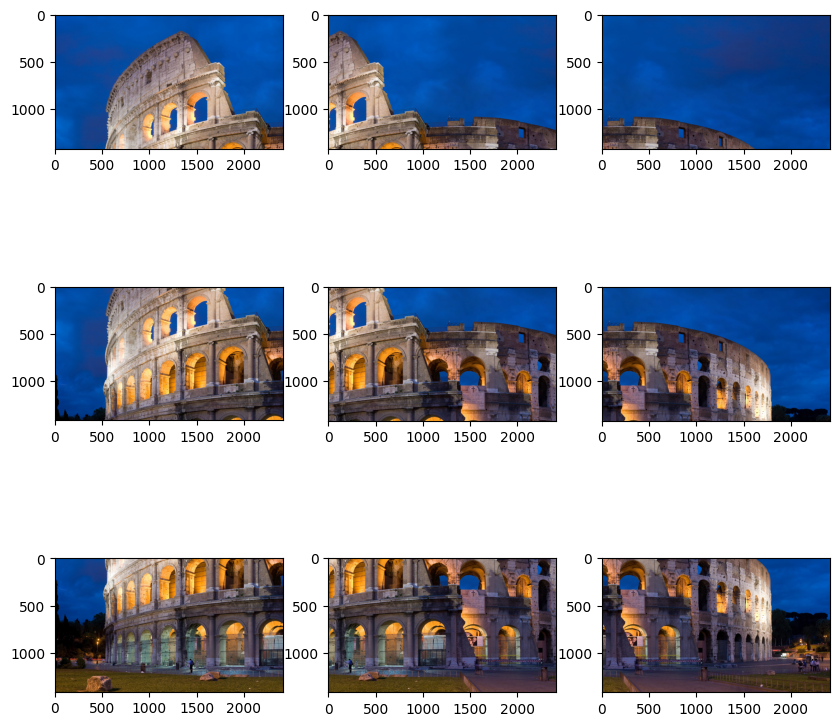

In [ ]:
plt.figure(figsize=(10,10))
A, B = image.size
k=0
for j in range(3):
  for i in range(3):
    im = image.crop((A/4*i,B/4*j,A/4*i+A/2,B/4*j+B/2))
    plt.subplot(3,3,1+k)
    plt.imshow(im)
    k += 1
    input_image = image_preprocess_cap["eval"](im).unsqueeze(0).cuda()
    captions = model_cap.generate({"image": input_image}, use_nucleus_sampling=True, num_captions=1)
    print(f'{k})',captions)

## Lavorare sull'immagine

### Spezzare l'immagine in pezzettini

1) the side of a building that is built into concrete
2) the very large clock tower is towering over the building
3) a man is standing near the roman colossion in the evening
4) the view from the outside of the roman colossion at night


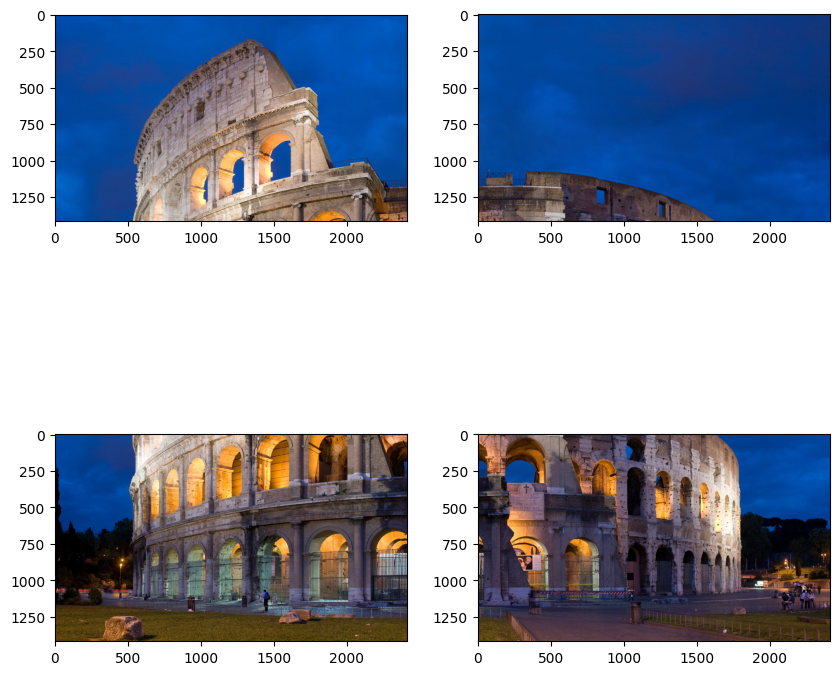

In [ ]:
plt.figure(figsize=(10,10))
A, B = image.size
k=0
image_pecies = []
captions = []
for j in range(2):
  for i in range(2):
    im = image.crop((A/2*i,B/2*j,A/2*i+A/2,B/2*j+B/2))
    plt.subplot(2,2,1+k)
    plt.imshow(im)
    image_pecies.append(im)
    k += 1
    input_image = image_preprocess_cap["eval"](im).unsqueeze(0).cuda()
    captions += model_cap.generate({"image": input_image}, use_nucleus_sampling=True, num_captions=1)
    print(f'{k})', captions[k-1])

5) a stone wall of a building under blue skies
6) the top of an ancient structure with a clock tower
7) an airplane flies in the blue sky
8) a large jet plane flying through a cloudy sky
9) two people are standing in front of a wall
10) a white building with three columns on it's side
11) an elaborate architecture and clock is lit up at night
12) a clock tower with a sky background at night
13) a photo taken in a very unusual way of looking at the sky
14) the top half of a clock tower with a sky background
15) a big building with some very tall buildings
16) a photo of an old looking building with an illuminated arch
17) there is an ancient arch that has a clock on it
18) the coliseum in rome has roman ruins on both sides
19) a view of some people on the outside of a structure
20) an illuminated arch and clock are near the outside wall of the building
21) a clock is displayed at the entrance of an ancient building
22) a clock sitting on top of an arena near a building
23) the clock is 

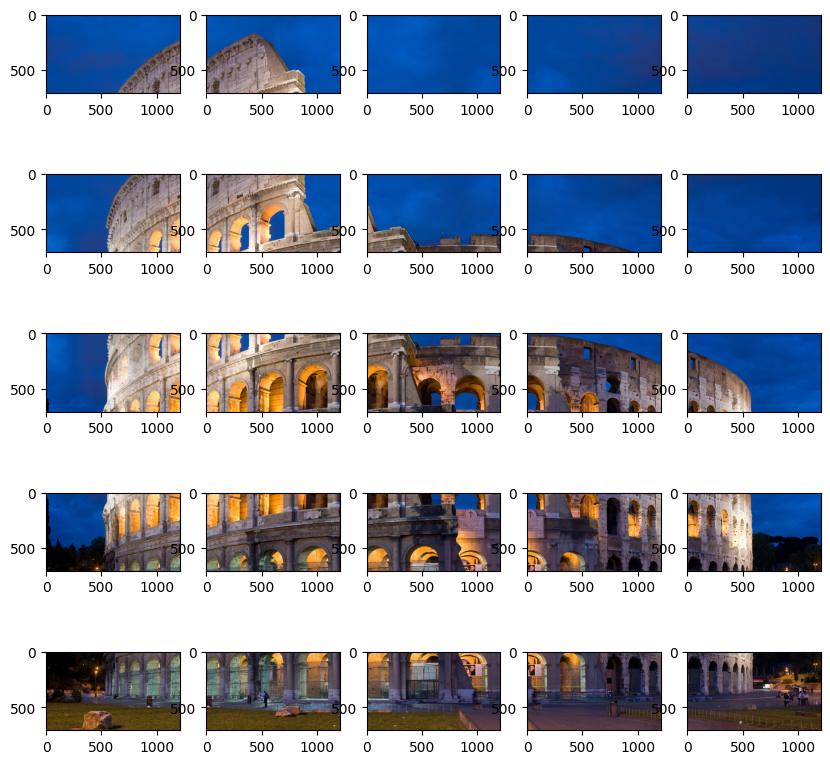

In [ ]:
plt.figure(figsize=(10,10))
A, B = image.size
k=0

for j in range(5):
  for i in range(5):
    im = image.crop((3*A*i/16,3*B*j/16,A*3/16*i+A/4,B*3/16*j+B/4))
    image_pecies.append(im)
    plt.subplot(5,5,1+k)
    plt.imshow(im)
    k += 1
    input_image = image_preprocess_cap["eval"](im).unsqueeze(0).cuda()
    captions += model_cap.generate({"image": input_image}, use_nucleus_sampling=True, num_captions=1)
    print(f'{k+4})', captions[k-1+4])

In [ ]:
image_pecies.append(image)
input_image = image_preprocess_cap["eval"](image).unsqueeze(0).cuda()
captions += model_cap.generate({"image": input_image}, use_nucleus_sampling=True, num_captions=1)
print(captions[-1])

an image of the famous colossion in italy


### Caption da cercare

In [ ]:
TARGET = 'The car in the square'

### Codificare i pezzetti e la caption

In [ ]:
import clip
import torch
import numpy as np

In [ ]:
modelCLIP, preprocessCLIP = clip.load("RN50", device='cuda')

100%|███████████████████████████████████████| 244M/244M [00:05<00:00, 48.6MiB/s]


In [ ]:
modelCLIP.cuda().eval()

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

In [ ]:
images = [preprocessCLIP(im) for im in image_pecies]

images = torch.tensor(np.stack(images)).cuda()
text_tokens = clip.tokenize([desc for desc in captions]).cuda()
target_caption = clip.tokenize(TARGET).cuda()

with torch.no_grad():
  images_z = modelCLIP.encode_image(images).float()
  texts_z = modelCLIP.encode_text(text_tokens).float()
  target_caption_z = modelCLIP.encode_text(target_caption).float()

In [ ]:
print(images_z.shape, texts_z.shape, target_caption_z.shape)

torch.Size([30, 1024]) torch.Size([30, 1024]) torch.Size([1, 1024])


### Confrontare i pezzi con la caption

In [ ]:
def cosine_similarity(images_z: torch.Tensor, texts_z: torch.Tensor):
  # normalise the image and the text
  images_z /= images_z.norm(dim=-1, keepdim=True)
  texts_z /= texts_z.norm(dim=-1, keepdim=True)

  # evaluate the cosine similarity between the sets of features
  similarity = (texts_z @ images_z.T)

  return similarity.cpu()

In [ ]:
im_sim = torch.Tensor(0)
print(im_sim)
for im in images_z:
  similarity = cosine_similarity(im, target_caption_z)
  im_sim = torch.cat((im_sim, similarity),0)

print(im_sim)


tensor([])
tensor([0.1369, 0.1571, 0.1548, 0.1532, 0.1659, 0.1530, 0.1651, 0.1679, 0.1638,
        0.1382, 0.1382, 0.1494, 0.1594, 0.1565, 0.1322, 0.1369, 0.1379, 0.1440,
        0.1438, 0.1429, 0.1473, 0.1427, 0.1465, 0.1335, 0.1920, 0.1658, 0.1857,
        0.1755, 0.1960, 0.1342])


<ipython-input-18-039b160a5f90>:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  similarity = (texts_z @ images_z.T)


In [ ]:
# soft_max = torch.nn.Softmax(0)
# similarity = soft_max(im_sim)
# print(similarity)

In [ ]:
a, b = torch.topk(im_sim, 5, sorted=True)
print(b)

tensor([28, 24, 26, 27,  7])


In [ ]:
text_sim = torch.Tensor(0)
print(text_sim)
for im in texts_z:
  similarity = cosine_similarity(im, target_caption_z)
  text_sim = torch.cat((text_sim, similarity),0)

print(text_sim)

tensor([])
tensor([0.6569, 0.7002, 0.6634, 0.6915, 0.5749, 0.7241, 0.7006, 0.6221, 0.6673,
        0.6641, 0.7181, 0.5896, 0.6330, 0.6607, 0.7026, 0.6253, 0.6767, 0.4706,
        0.7484, 0.6145, 0.6814, 0.6435, 0.7086, 0.6664, 0.5598, 0.6039, 0.6912,
        0.6743, 0.6771, 0.7271])


In [ ]:
c, d = torch.topk(text_sim, 5, sorted=True)
print(d)

tensor([18, 29,  5, 10, 22])


In [ ]:
# common_idx = list(set(b.tolist()).intersection(d.tolist()))
# print(common_idx)
# if len(common_idx)==0:
#   common_idx = b.tolist()
#   print('done')

common_idx = b.tolist()
print(common_idx)

[28, 24, 26, 27, 7]


### Pezzi grezzi

5


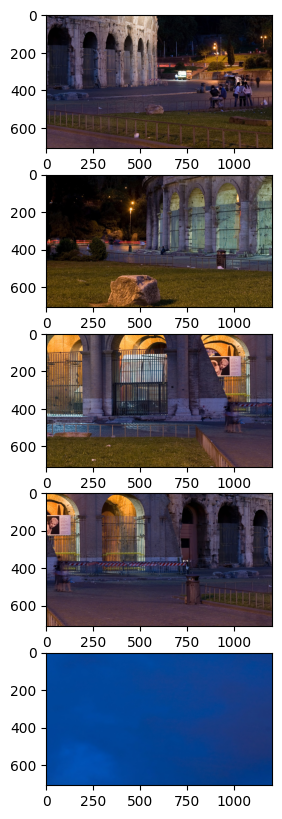

In [ ]:
plt.figure(figsize=(10,10))
l = len(common_idx)
print(l)
k=0
for j in common_idx:
  plt.subplot(l,1,1+k)
  plt.imshow(image_pecies[j])
  k += 1

### Caricare il modello

In [ ]:
model, image_preprocess, text_preprocess = lavis.models.load_model_and_preprocess(
  "blip_image_text_matching", "large", is_eval=True, device='cuda'
)

100%|██████████| 3.43G/3.43G [01:42<00:00, 36.0MB/s]


### Text localization

In [ ]:
print(TARGET)

The car in the square


In [ ]:
input_image = image_preprocess["eval"](image_pecies[common_idx[0]]).unsqueeze(0).cuda()
input_text = text_preprocess["eval"](TARGET)

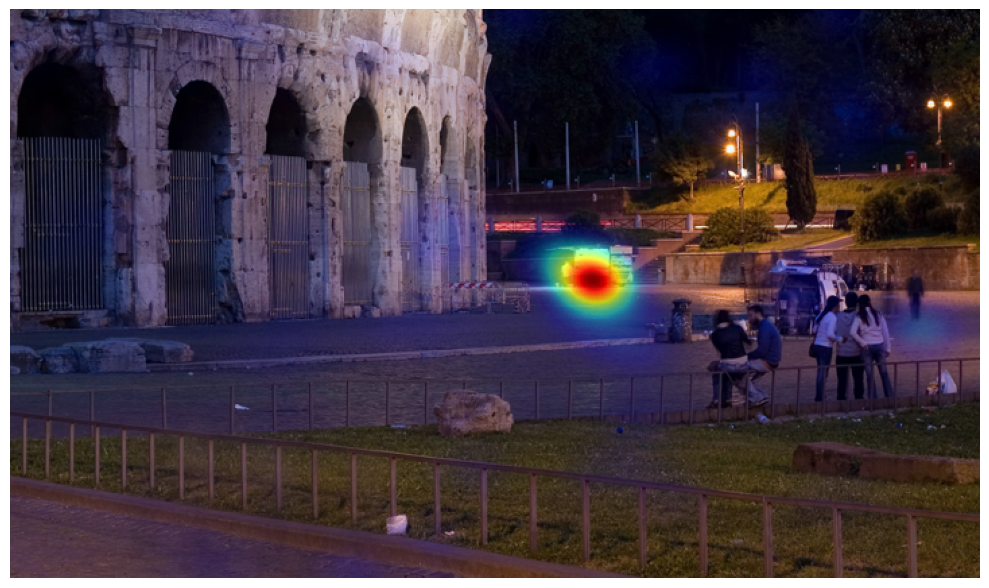

In [ ]:
import matplotlib.pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam


def rescale_image(image: Image, target_width: int = 720):
  w, h = image.size
  scale = target_width / w
  image = image.resize((int(w * scale), int(h * scale)))

  return image

def visualise_gradcam(
  gradcam, image: Image, text_tokens: torch.Tensor = None, average: bool = True, image_target_width: int = 720
):
  image = rescale_image(image, target_width=image_target_width)
  image_norm = np.float32(image) / 255

  if average:
    # get the average gradcap
    gradcam = getAttMap(image_norm, gradcam[0][1], blur=True)

    # plot gradcam
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # ax.set_title(captions[common_idx[0]])
    ax.imshow(gradcam)
    ax.axis('off')
    fig.tight_layout()
  else:
    # get the number of images from the number of tokens
    num_image = len(text_tokens.input_ids[0]) - 2

    # create the image
    fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

    # create the iterators  
    gradcam_iter = iter(gradcam[0][2:-1])
    token_id_iter = iter(text_tokens.input_ids[0][1:-1])

    # plot an ax for each token
    for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
      word = model.tokenizer.decode([token_id])
      gradcam_image = getAttMap(image_norm, gradcam, blur=True)
      ax[i].imshow(gradcam_image)
      ax[i].set_yticks([])
      ax[i].set_xticks([])
      ax[i].set_xlabel(word)

# tokenize text
text_tokens = model.tokenizer(input_text, return_tensors="pt").to('cuda')

# evaluate the gradcam
gradcam, _ = compute_gradcam(
  model, input_image, input_text, text_tokens, block_num=7
)

# visualise the gradcam
visualise_gradcam(gradcam, image_pecies[common_idx[0]], text_tokens=text_tokens, average=True)

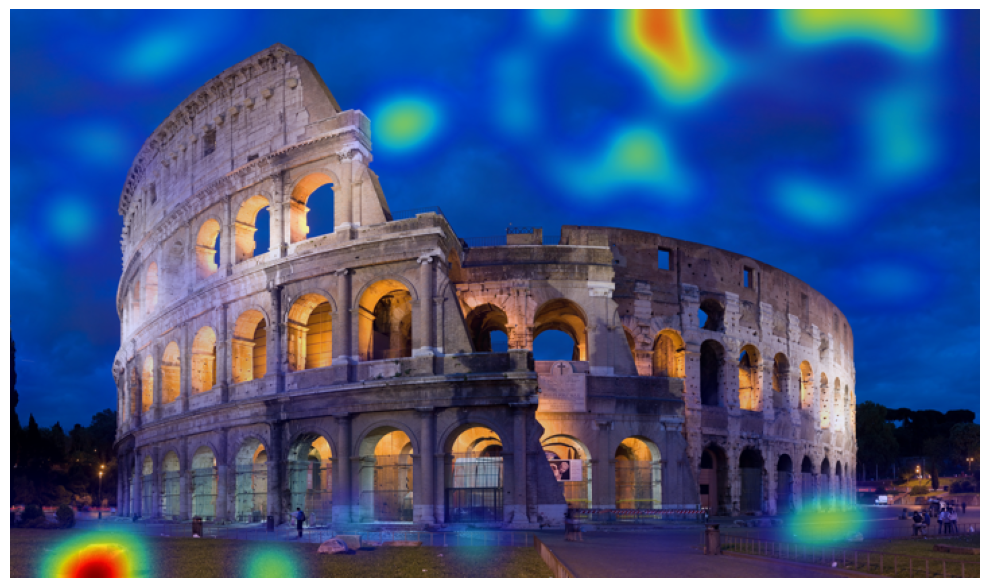

In [ ]:
input_image = image_preprocess["eval"](image).unsqueeze(0).cuda()
input_text = text_preprocess["eval"](TARGET)
text_tokens = model.tokenizer(input_text, return_tensors="pt").to('cuda')

# evaluate the gradcam
gradcam, _ = compute_gradcam(
  model, input_image, input_text, text_tokens, block_num=7
)

# visualise the gradcam
visualise_gradcam(gradcam, image, text_tokens=text_tokens, average=True)